In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from collections import Counter


EDA ON iris dataset


ATTRIBUTES


1.  sepal length in cm
2.  sepal width in cm
3.  petal length in cm
4.  petal width in cm


CLASS

*   Iris Setosa
*   Iris Versicolour
*   Iris Virginica

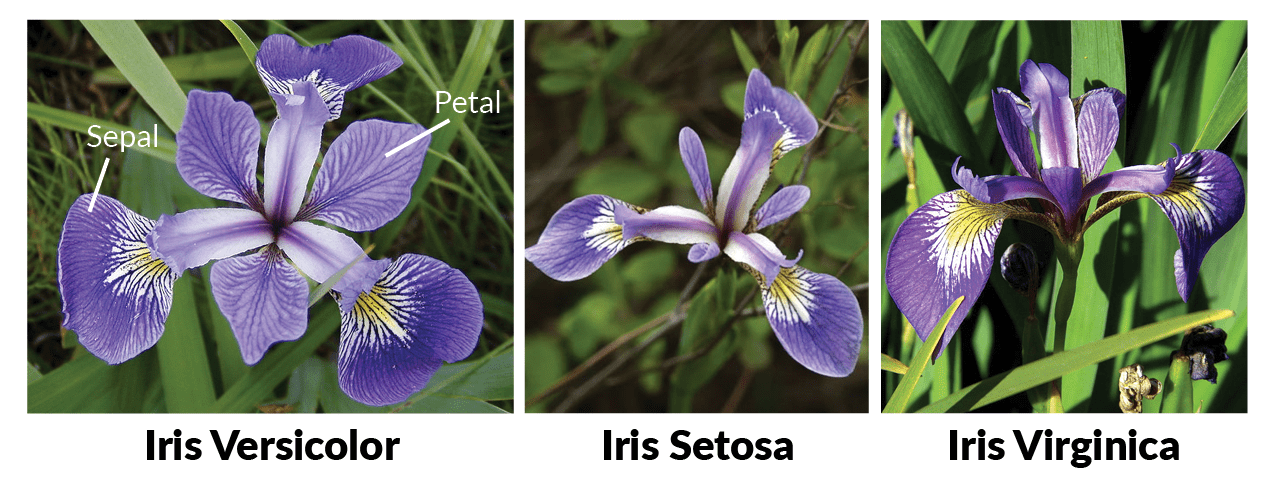























LOAD Iris dataset

In [ ]:
iris=datasets.load_iris()
#np.c_ is numpy concatenate function
iris_df=pd.DataFrame(data=np.c_[iris['data'],iris['target']],columns=iris['feature_names']  +  ['target'])

In [ ]:
iris_df.head(6)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0


Describe the dataset

In [ ]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

splitting the data

In [ ]:
X=iris_df.iloc[:,:-1]
Y=iris_df.iloc[:, -1]



In [ ]:
X.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
Y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

Splitting the data into train and test sets

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,shuffle=True,random_state=0)

In [ ]:
X_train.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2


In [ ]:
Y_train.head(5)

137    2.0
84     1.0
27     0.0
127    2.0
132    2.0
Name: target, dtype: float64

In [ ]:
X_test.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [ ]:
Y_test.head(5)

114    2.0
62     1.0
33     0.0
107    2.0
7      0.0
Name: target, dtype: float64

In [ ]:
#converting into numpy array
X_train=np.asarray(X_train)
Y_train=np.asarray(Y_train)

X_test=np.asarray(X_test)
Y_test=np.asarray(Y_test)

In [ ]:
print(f"training set size:{X_train.shape[0]}  samples")
print(f"test set size:{X_test.shape[0]}  samples")

training set size:120  samples
test set size:30  samples


Normalizing the data

In [ ]:
scaler=Normalizer().fit(X_train)
normalized_X_train=scaler.transform(X_train)
normalized_X_test=scaler.transform(X_test)




In [ ]:
print("X train before normalization")
print(X_train[0:5])
print("X train after normalization")
print(normalized_X_train[0:5])

X train before normalization
[[6.4 3.1 5.5 1.8]
 [5.4 3.  4.5 1.5]
 [5.2 3.5 1.5 0.2]
 [6.1 3.  4.9 1.8]
 [6.4 2.8 5.6 2.2]]
X train after normalization
[[0.69804799 0.338117   0.59988499 0.196326  ]
 [0.69333409 0.38518561 0.57777841 0.1925928 ]
 [0.80641965 0.54278246 0.23262105 0.03101614]
 [0.71171214 0.35002236 0.57170319 0.21001342]
 [0.69417747 0.30370264 0.60740528 0.2386235 ]]


Visualising the data

Text(0.5, 1.08, 'Pair plot of dataset after normalisation')

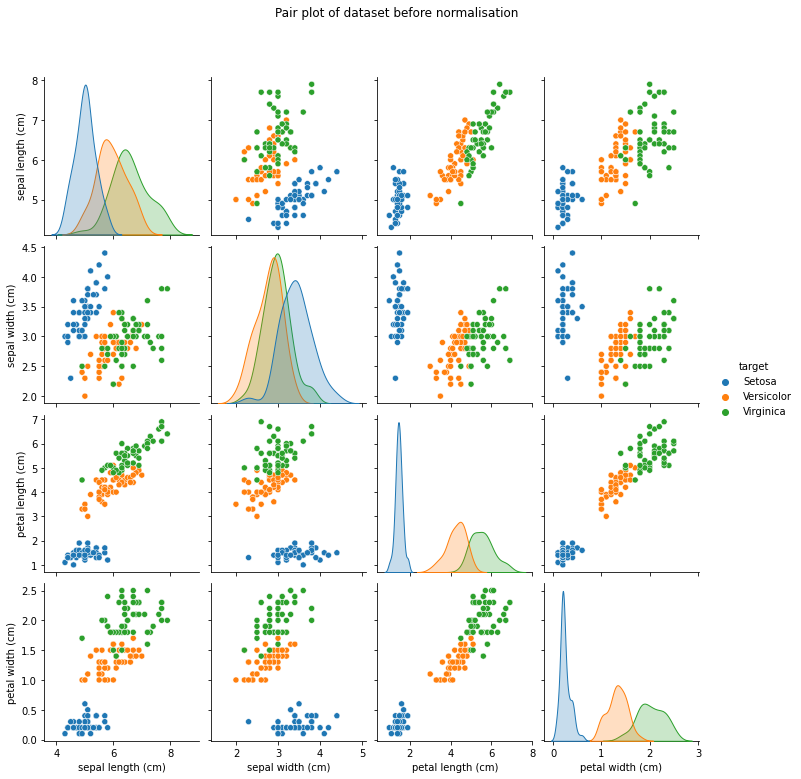

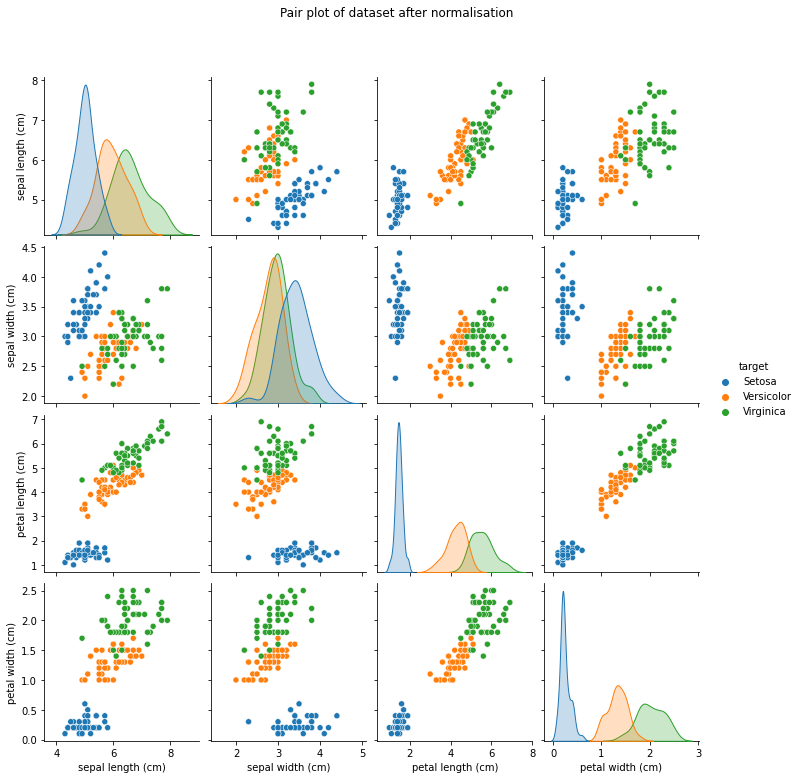

In [ ]:
#before
#view the relationships between variables color code by species type
di={ 0.0: "Setosa",1.0:"Versicolor",2.0:"Virginica"}

before=sns.pairplot(iris_df.replace({"target":di}),hue='target')
before.fig.suptitle("Pair plot of dataset before normalisation",y=1.08)



#after

iris_df_2=pd.DataFrame(data=np.c_[normalized_X_train,Y_train],columns=iris['feature_names']  +  ['target'])
di={0.0: "Setosa",1.0:"Versicolor",2.0:"Virginica"}
after=sns.pairplot(iris_df.replace({"target":di}),hue='target')
after.fig.suptitle("Pair plot of dataset after normalisation",y=1.08)


